# **Exploratory Data Analysis for Machine Learning**
Coursera.org - Peer-graded Assignment: Course Project - By Ghassen Babba


---














# Brief description of the data set and a summary of its attributes
For this project, I will be working on an US Cars Dataset, I found this Data set on kaggle.com and as it mentioned in its description on kaggle, this data set was scraped from auctionexport.com and it included Information about 28 brands of clean and used vehicles for sale in US and it contains 13 columns and 2499 rows. This Data Set could be useful for Cars price prediction.

Data Set source : https://www.kaggle.com/doaaalsenani/usa-cers-dataset



**Attributes :**

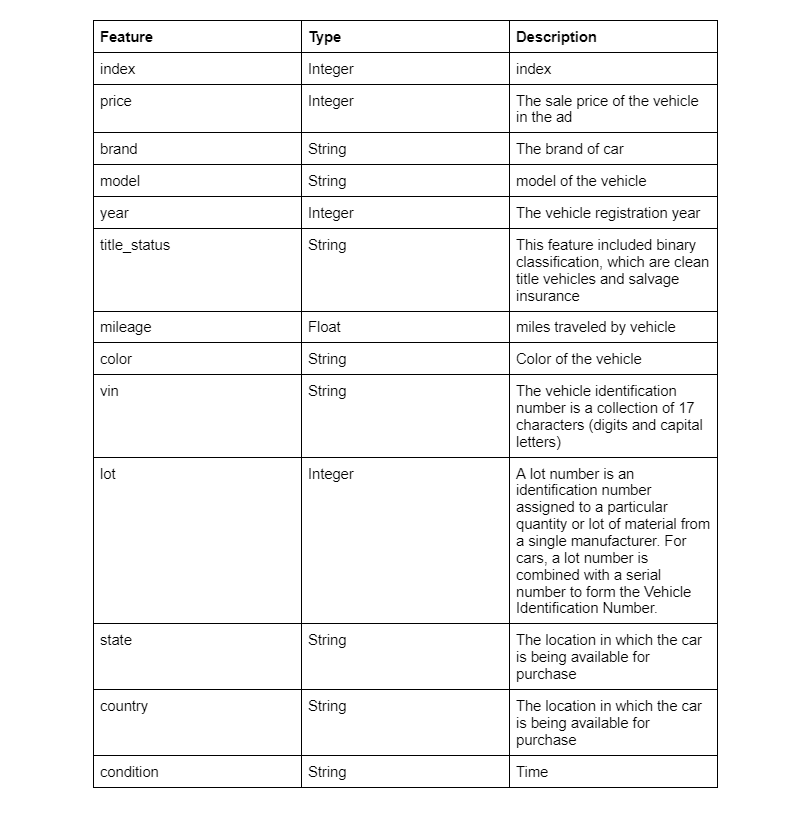







# Initial plan for data exploration

First, I need to import the right Python libraries and next read the data and display the head of Data set.


In [ ]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()


filepath = "USA_cars_datasets.csv"
data = pd.read_csv(filepath)

data.head(10)


Populating the interactive namespace from numpy and matplotlib


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


As shown above, the data retrieving is successfully done, now I can obtain some useful informations about the Data Set using the following Pandas library commands :


In [ ]:
print ('Shape : '+ str(data.shape) +'\n')

print ('\n Data types :')
print(data.dtypes)

print ('\n Data info :')
print(data.info())

print ('\n Summary statistics :')
data.describe(include='all')


Shape : (2499, 13)


 Data types :
Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

 Data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 1

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
count,2499.000000,2499.000000,2499,2499,2499.000000,2499,2.499000e+03,2499,2499,2.499000e+03,2499,2499,2499
unique,NaN,NaN,28,127,NaN,2,NaN,49,2495,NaN,44,2,47
top,NaN,NaN,ford,door,NaN,clean vehicle,NaN,white,1g1al58f787159241,NaN,pennsylvania,usa,2 days left
freq,NaN,NaN,1235,651,NaN,2336,NaN,707,2,NaN,299,2492,832
mean,1249.000000,18767.671469,NaN,NaN,2016.714286,NaN,5.229869e+04,NaN,NaN,1.676914e+08,NaN,NaN,NaN
std,721.543484,12116.094936,NaN,NaN,3.442656,NaN,5.970552e+04,NaN,NaN,2.038772e+05,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,1973.000000,NaN,0.000000e+00,NaN,NaN,1.593488e+08,NaN,NaN,NaN
25%,624.500000,10200.000000,NaN,NaN,2016.000000,NaN,2.146650e+04,NaN,NaN,1.676253e+08,NaN,NaN,NaN
50%,1249.000000,16900.000000,NaN,NaN,2018.000000,NaN,3.536500e+04,NaN,NaN,1.677451e+08,NaN,NaN,NaN
75%,1873.500000,25555.500000,NaN,NaN,2019.000000,NaN,6.347250e+04,NaN,NaN,1.677798e+08,NaN,NaN,NaN


# Actions taken for data cleaning and feature engineering

As I want to use this Data Set for price prediction, the Data Frame I created as shown in the previous sections, contains few columns that we don't need, the next step will be dropping the following columns :

- **vin** : this column contains unique values for each row, so it's not useful for our case.

- **lot** : this column displays an identification number that we don't need it for our case.
- **condition** : this column is not useful for our case.
- **Unnamed** : this column is not useful for our case.


In [ ]:
df = data.copy() # Keep a copy our original data 

# Remove thecolumns as index base
df.drop(df.columns[[0, 8, 9, 12]], axis = 1, inplace = True)

df.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa


The next step is to convert the categorical variables to dummies, but first would be better to have more informations about the count of each categorical values

In [ ]:
df['brand'].value_counts()

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
buick                13
kia                  13
honda                12
infiniti             12
mercedes-benz        10
cadillac             10
heartland             5
audi                  4
peterbilt             4
land                  4
acura                 3
lexus                 2
mazda                 2
lincoln               2
toyota                1
jaguar                1
ram                   1
maserati              1
harley-davidson       1
Name: brand, dtype: int64

As shown above for each brand value count, there are brands with few rows, so it would be better if we drop these rows.

I will drop rows with brand values count less than 15 :

In [ ]:
counts = df['brand'].value_counts()
df = df[~df['brand'].isin(counts[counts < 15].index)]
df['brand'].value_counts()

ford         1235
dodge         432
nissan        312
chevrolet     297
gmc            42
jeep           30
chrysler       18
bmw            17
hyundai        15
Name: brand, dtype: int64

In [ ]:
df['country'].value_counts()

 usa       2391
 canada       7
Name: country, dtype: int64

For the country's each values count, we can see that we have only few rows For Canada, so it would be better if we remove the rows which have canada as value in the country column and then drop the whole column since the country column will have only one and the same value for all rows

In [ ]:
df.drop(df[df['country'] == 'canada'].index, inplace = True)
df.drop('country', axis='columns', inplace = True)

In [ ]:
df['model'].value_counts()

door       620
f-150      219
doors      143
caravan    102
mpv         73
          ... 
vehicl       1
energi       1
suv          1
2500hd       1
xterra       1
Name: model, Length: 97, dtype: int64

As shown above there are few rows for some models, and since we can't remove more rows it will be better if we change the values of all rows with low value counts to the value 'Other'.

In [ ]:
mask = df.model.map(df.model.value_counts()) < 20
df.loc[mask, 'model'] = 'Other'

In [ ]:
df['color'].value_counts()

white                                      686
black                                      491
gray                                       377
silver                                     290
red                                        188
blue                                       141
no_color                                    57
green                                       22
orange                                      20
charcoal                                    18
gold                                        18
brown                                       12
yellow                                       9
magnetic metallic                            6
shadow black                                 5
ingot silver metallic                        4
color:                                       4
oxford white                                 4
beige                                        3
super black                                  3
triple yellow tri-coat                       3
billet silver

We do the same for color column, also I will replace 'no_color' value with 'Other' :

In [ ]:
mask = df.color.map(df.color.value_counts()) < 10
df.loc[mask, 'color'] = 'Other'

mask2 = df.color == 'no_color'
df.loc[mask2, 'color'] = 'Other'


In [ ]:
df['state'].value_counts()

pennsylvania      293
florida           224
texas             205
california        178
michigan          161
north carolina    142
minnesota         117
illinois          112
wisconsin          88
nevada             85
new jersey         83
virginia           80
oklahoma           71
south carolina     64
new york           54
georgia            50
missouri           45
arizona            33
ohio               30
oregon             27
massachusetts      27
mississippi        24
tennessee          24
colorado           21
west virginia      21
connecticut        21
alabama            17
washington         13
indiana            12
arkansas           11
louisiana          11
utah               10
kentucky            9
ontario             7
new hampshire       4
new mexico          4
maryland            4
nebraska            4
kansas              4
idaho               2
rhode island        2
vermont             2
montana             1
wyoming             1
Name: state, dtype: int64

Again the same previous work for the state Column :

In [ ]:
mask = df.state.map(df.state.value_counts()) < 15
df.loc[mask, 'state'] = 'Other'


Now I can finaly convert categorical variables to dummies :

In [ ]:
# Save a copy
df2 = df.copy()

# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2398.0,18890.204754,12003.938439,0.0,10400.0,17000.0,25800.00,74000.0
year,2398.0,2016.771476,3.403645,1973.0,2016.0,2018.0,2019.00,2020.0
mileage,2398.0,51121.513761,50562.637297,0.0,21598.0,35292.0,62765.25,999999.0
brand_chevrolet,2398.0,0.123853,0.329483,0.0,0.0,0.0,0.00,1.0
brand_chrysler,2398.0,0.007506,0.086331,0.0,0.0,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
state_tennessee,2398.0,0.010008,0.099561,0.0,0.0,0.0,0.00,1.0
state_texas,2398.0,0.085488,0.279665,0.0,0.0,0.0,0.00,1.0
state_virginia,2398.0,0.033361,0.179615,0.0,0.0,0.0,0.00,1.0
state_west virginia,2398.0,0.008757,0.093189,0.0,0.0,0.0,0.00,1.0


The next step is to make skew variables symmetric, the only column that we could apply that on it, is the mileage column.

In [ ]:
# Create a list of float colums to check for skewing
mask = df.dtypes == np.float
float_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
mileage,4.647573


# Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner



Using seaborn library we can generate boxplot, it's a good way to show simple summary of the distribution of results, as shown below the price distribution of each brand :


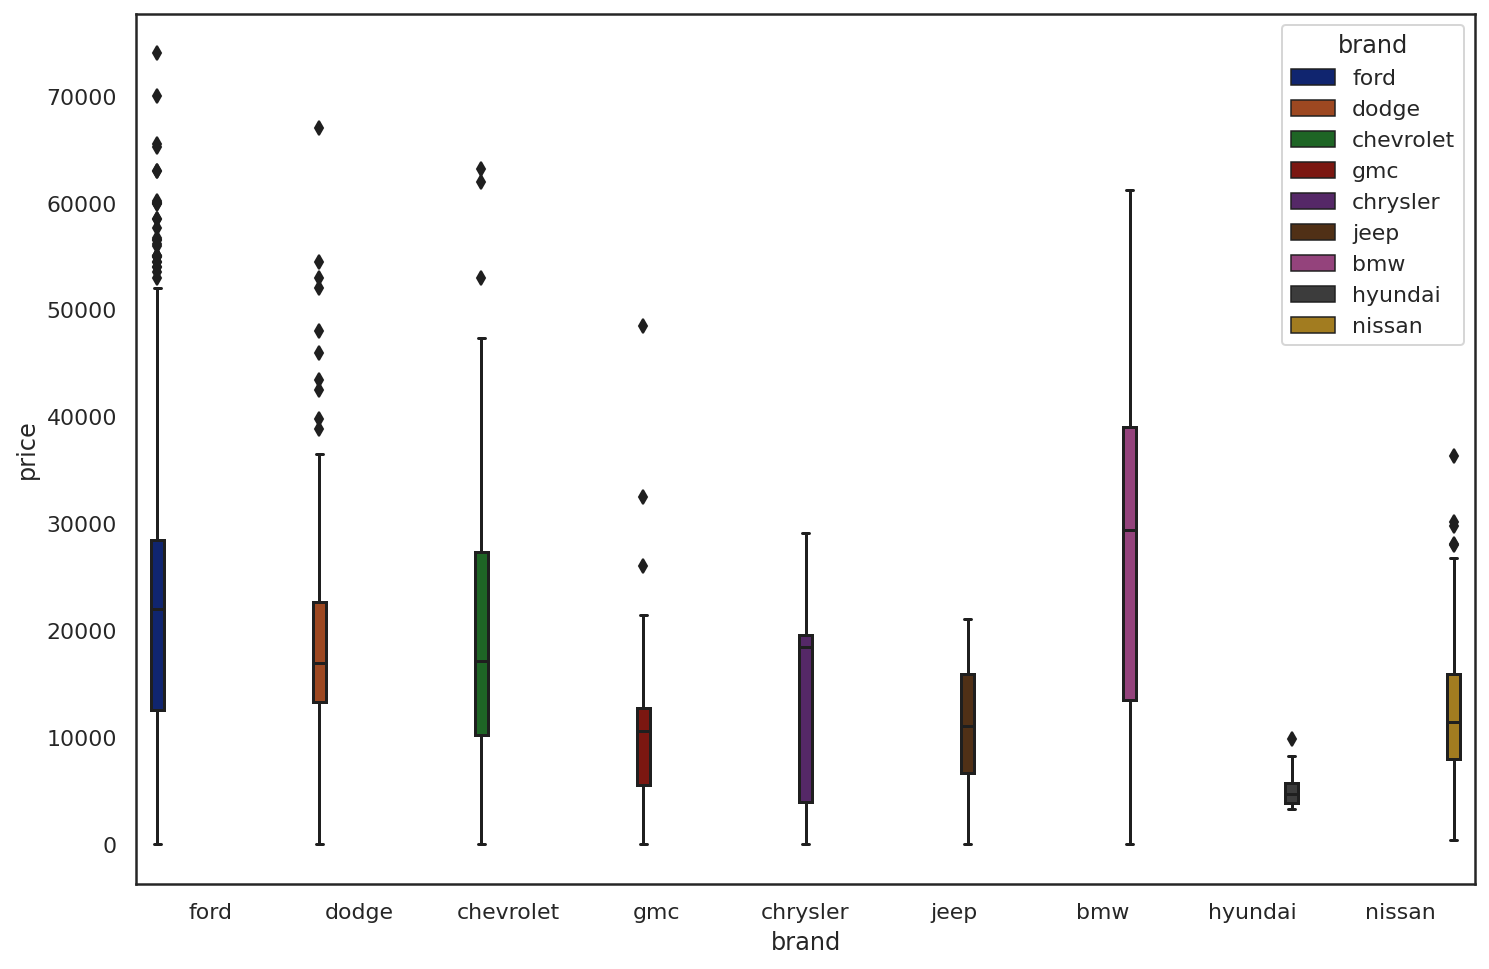

In [ ]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(12,8))
sns.boxplot(x='brand', y='price', 
            hue='brand', data=df2);

We can have an idea about the price mean of each Color :

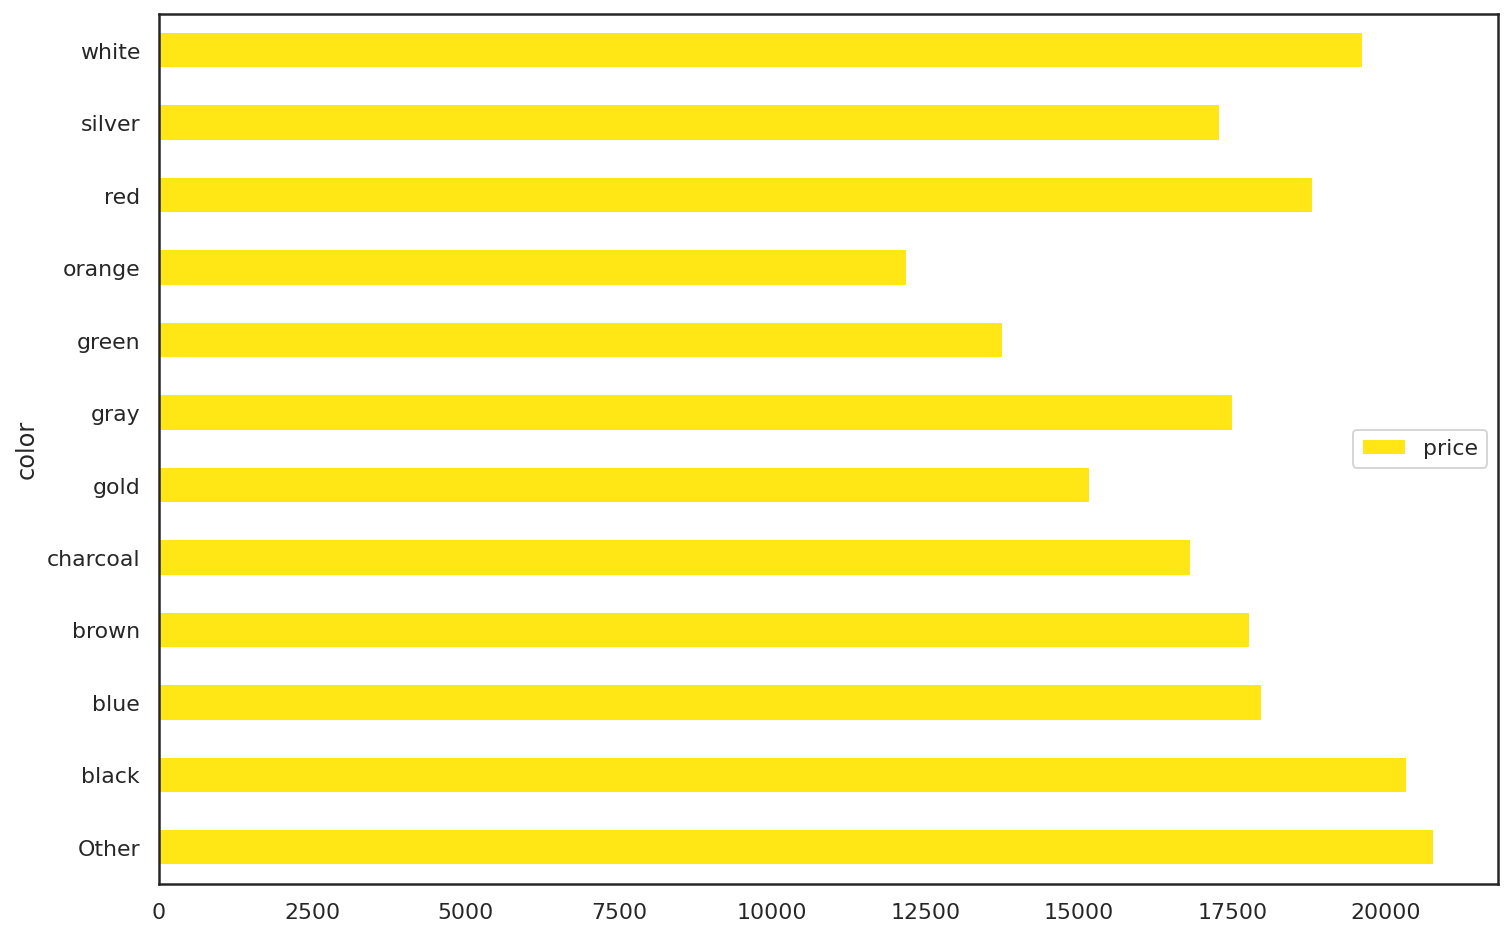

In [ ]:
df_Color = df2[['price','color']].groupby('color').mean()
ax = df_Color.plot.barh(figsize=(12,8), color='#FEE715FF')


We do the same for the Model Column :

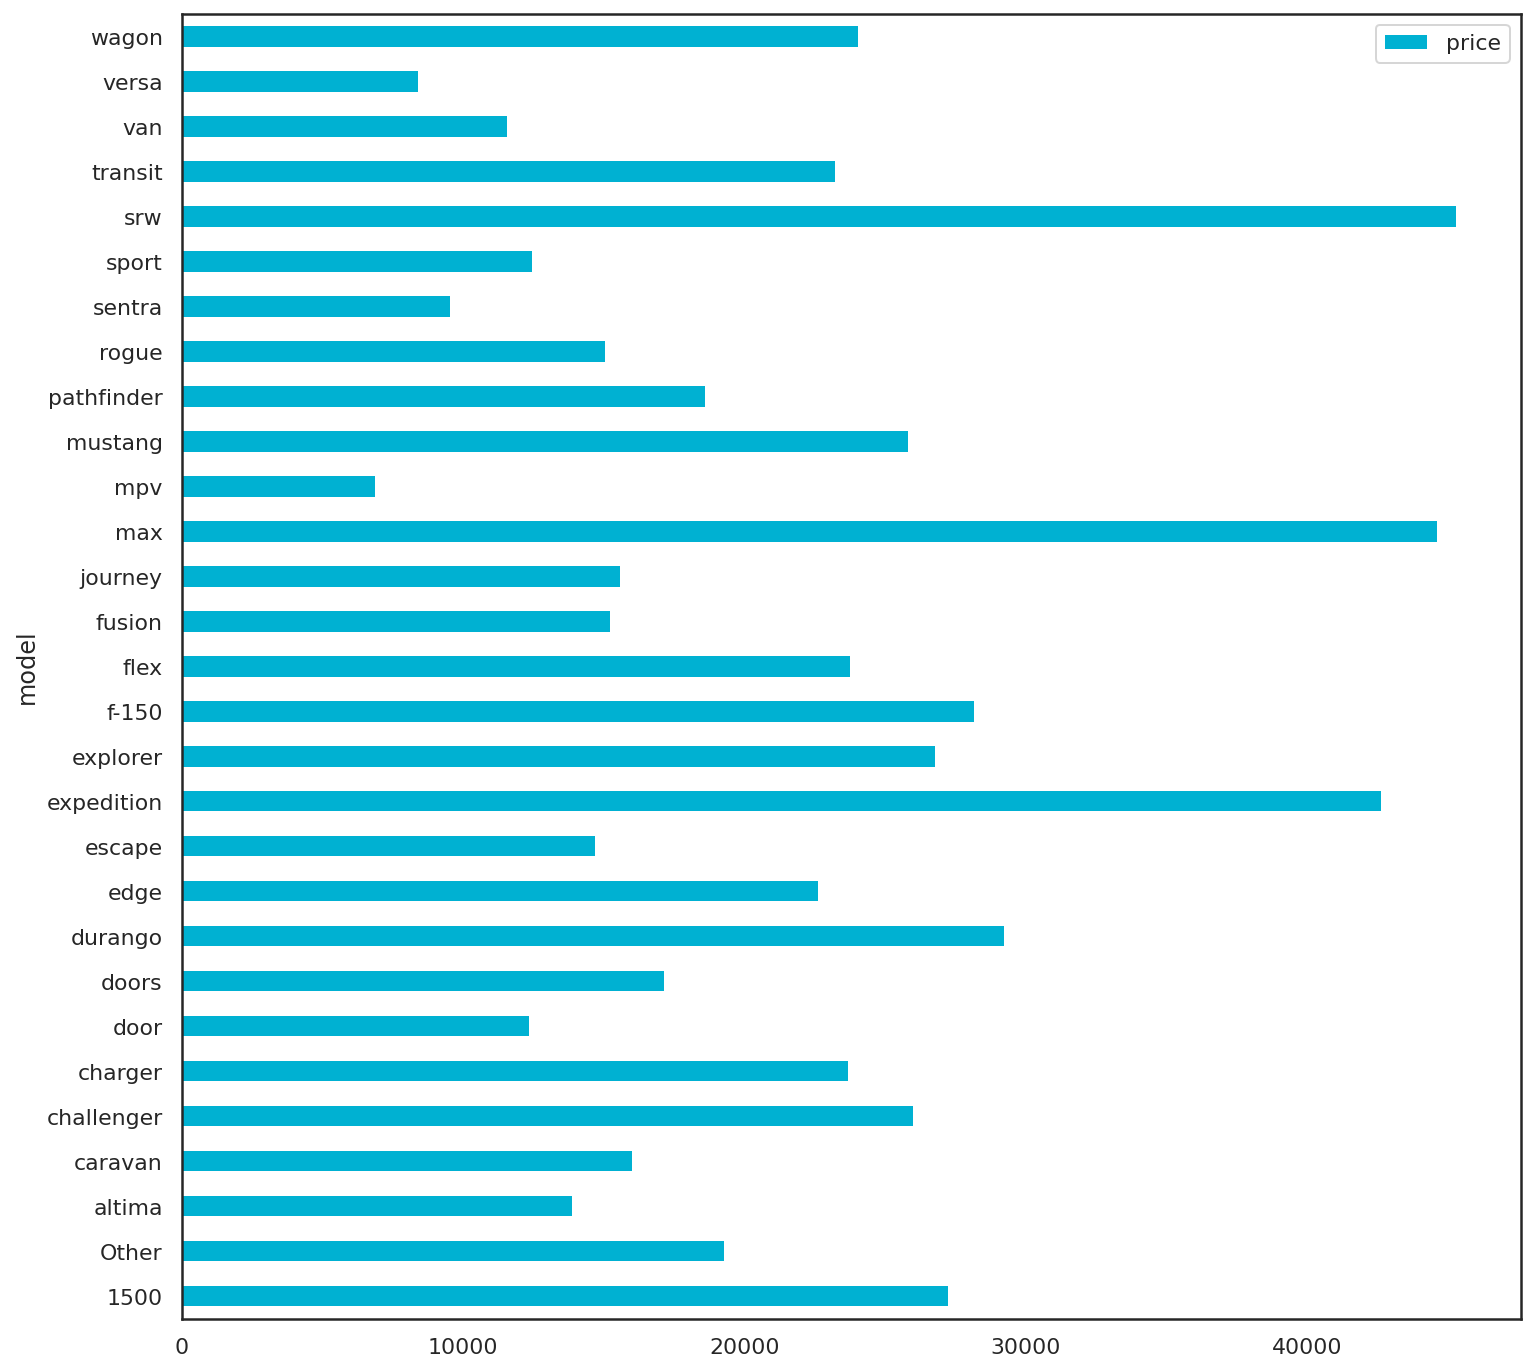

In [ ]:
df_Model = df2[['price','model']].groupby('model').mean()
ax2 = df_Model.plot.barh(figsize=(12,12), color='#00B1D2FF')

Hbar for Title status and its price mean :

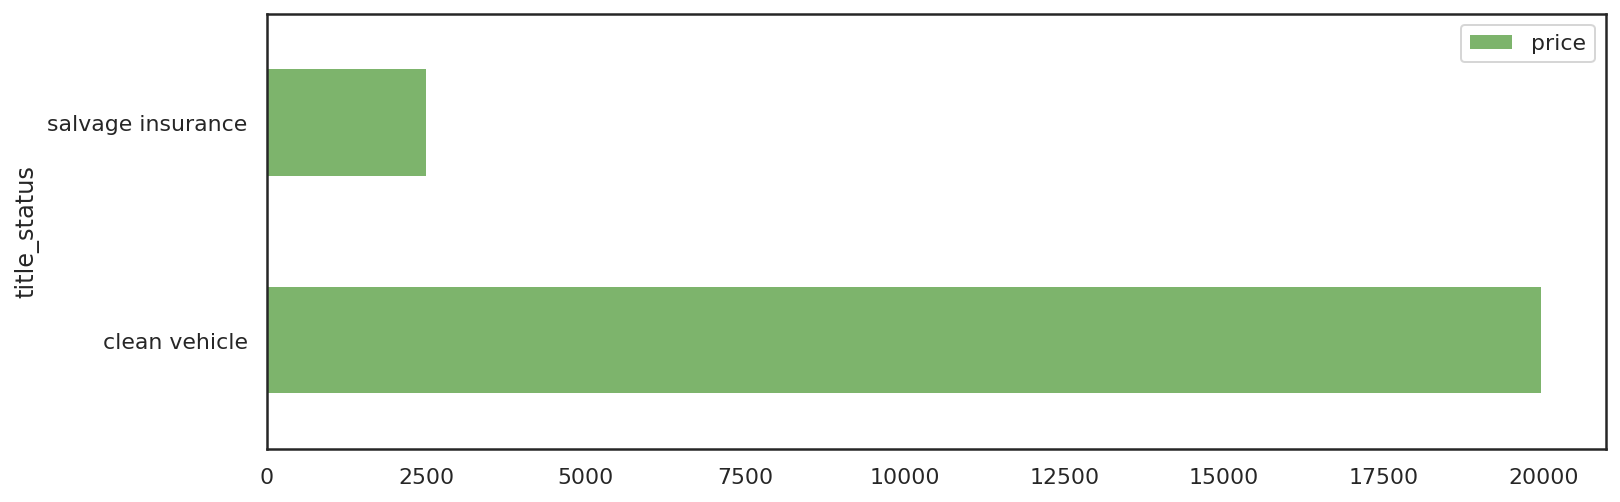

In [ ]:
df_sTitle = df2[['price','title_status']].groupby('title_status').mean()
ax3 = df_sTitle.plot.barh(figsize=(12,4), color='#7DB46CFF')

Price dependancy on Mileage :

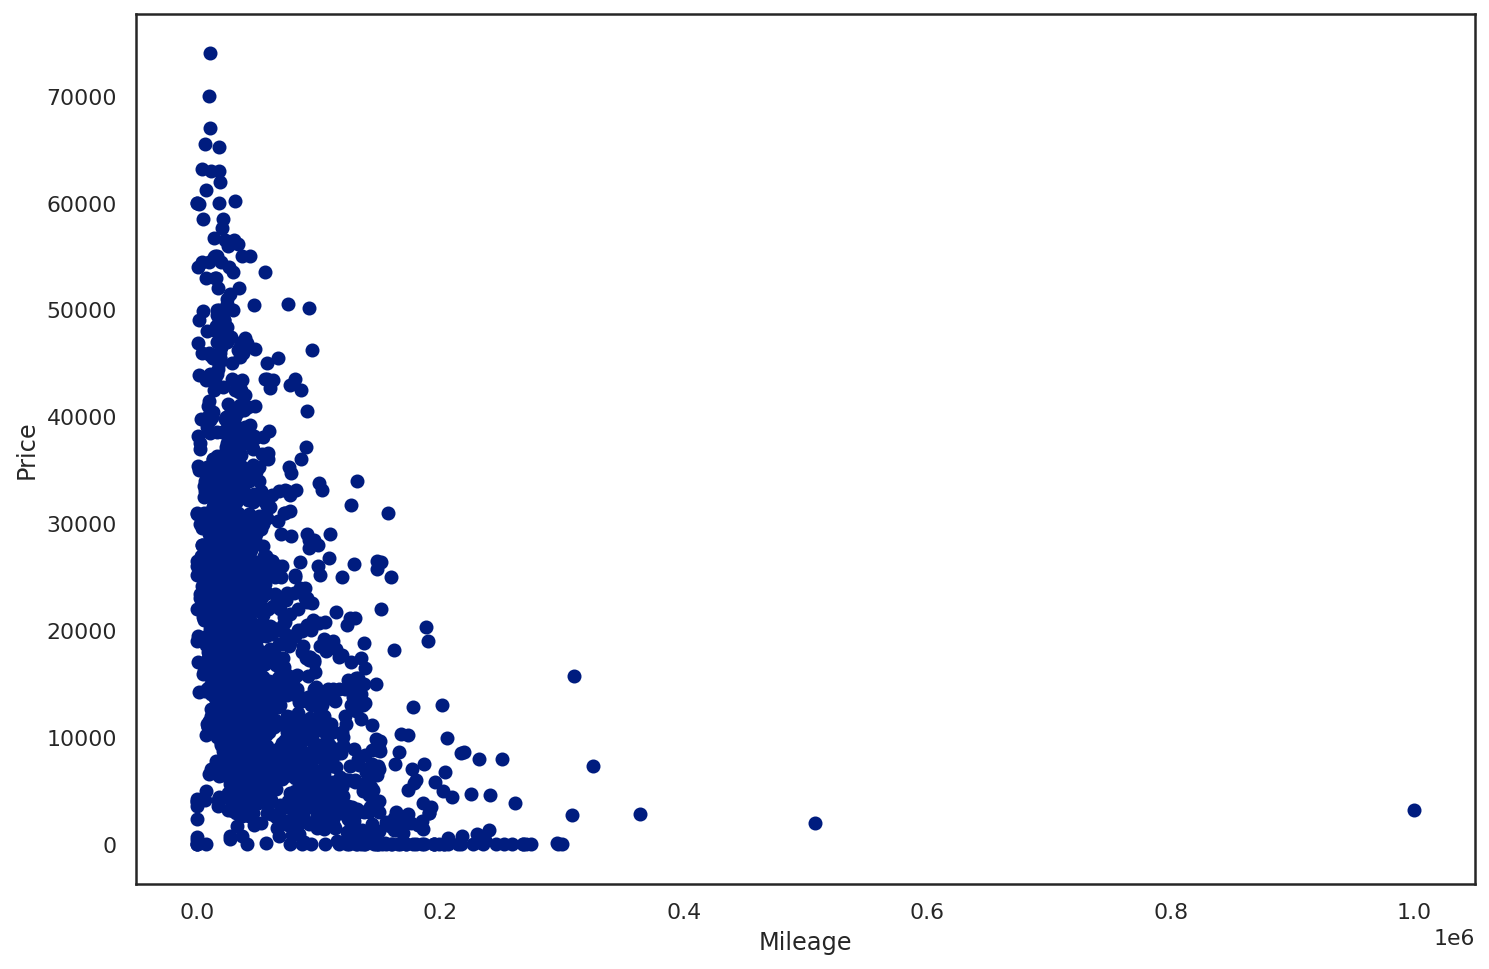

In [ ]:
fig, ax5 = plt.subplots(figsize=(12,8))
ax5.scatter(df2['mileage'], df2['price'])
ax5.set_xlabel('Mileage')
ax5.set_ylabel('Price')
plt.show()

Evolution of price mean per year :

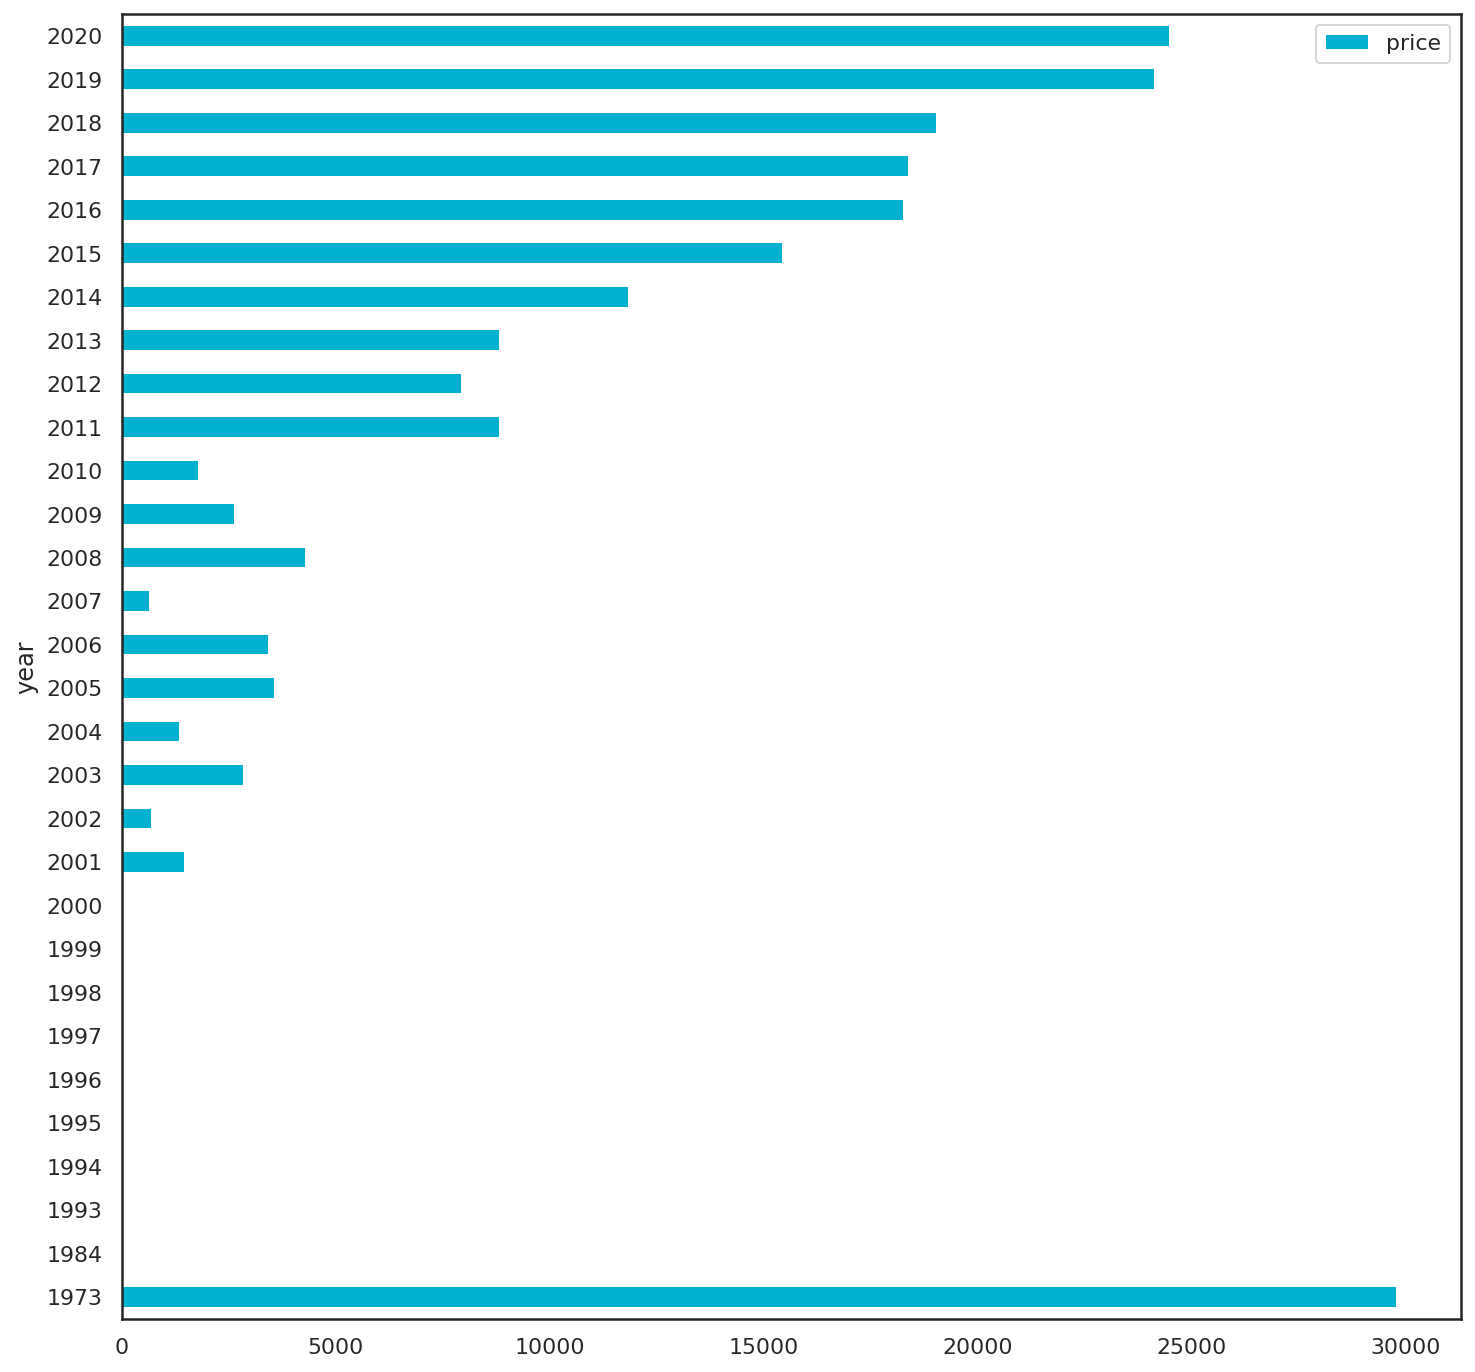

In [ ]:
df_Year = df2[['price','year']].groupby('year').mean()
ax4 = df_Year.plot.barh(figsize=(12,12), color='#00B1D2FF')

Price mean per state :

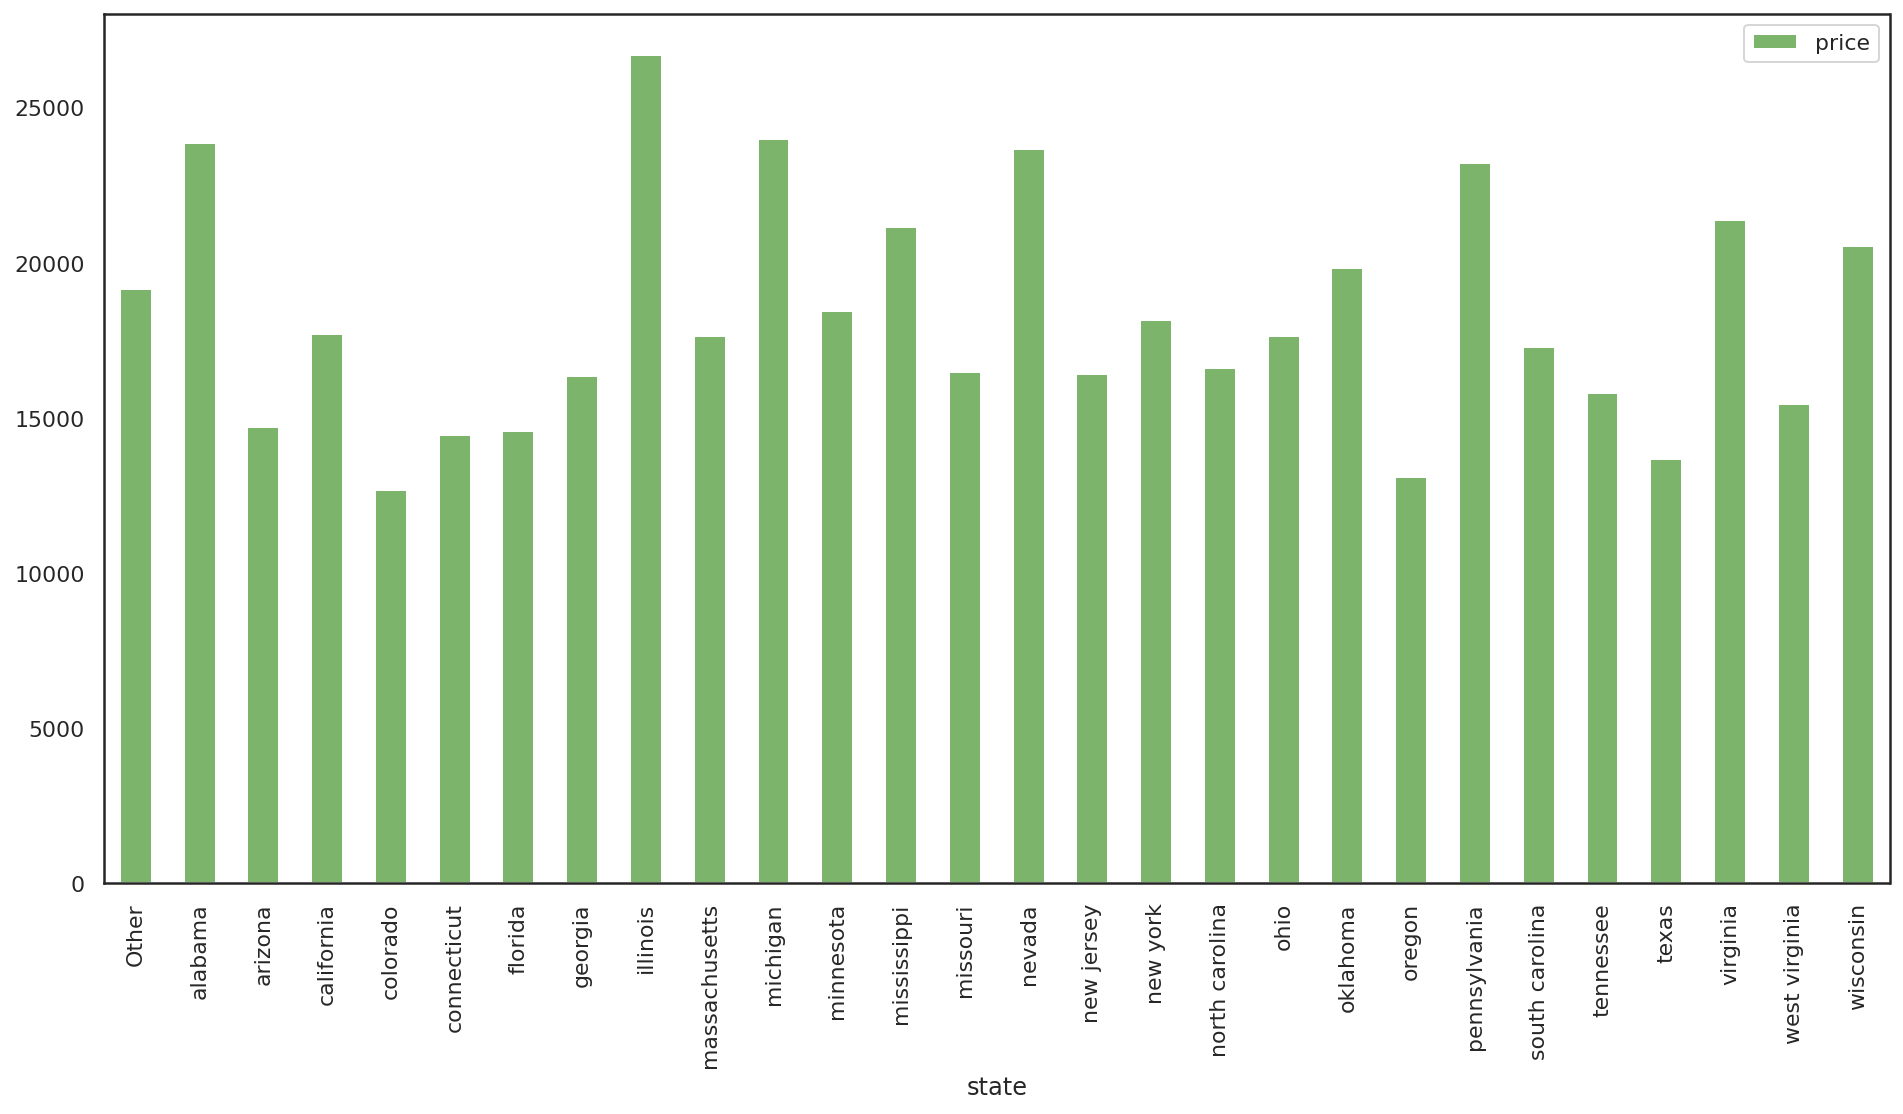

In [ ]:
df_state = df2[['price','state']].groupby('state').mean()
ax6 = df_state.plot.bar(figsize=(16,8), color='#7DB46CFF')

# Formulating at least 3 hypothesis about this data

**Hypothesis 1 :**
- Null Hypothesis: The average selling price of a car in 2020 is 23000.
- Alternate Hypothesis: The average selling price of the cars in 2020 is less than 23000.

**Hypothesis 2 :**
- Null Hypothesis: The average selling price of an Orange car is  cheaper than any other average selling price car with different Color.
- Alternate Hypothesis: The average selling price of an Orange the cars is equal or Greater than any other average selling price car with different Color.

**Hypothesis 3 :**
- Null Hypothesis: The average selling price of a car in Illinois is greater than the average selling price in Colorado.
- Alternate Hypothesis: The average selling price of a car in Illinois is equal or less than the average selling price in Colorado.

# Conducting a formal significance test for one of the hypotheses and discuss the results 





**Hypothesis 1 :**

- Null Hypothesis: The average selling price of a car in 2020 is 23000.
- Alternate Hypothesis: The average selling price of the cars in 2020 is less than 22000.

Population: All the data for registred Cars in 2020


In [ ]:
from scipy.stats import ttest_1samp
import numpy as np

rslt_df = df2.loc[df2['year'] == 2020]

tset, pval = ttest_1samp(a=rslt_df['price'], popmean=23000)
print('p-values',pval)


p-values 0.4232779080828728


**Hypothesis test conclusion :**
The p-value equal 0.4232779080828728 is way higher than the standard confidence level 0.05, so the null hypothesis is correct and the average selling price of a car in 2020 is 23000.

# Suggestions for next steps in analyzing this data

The next step in analyzing this data would be Correlation analysis, this is an important step to know which features are more related to the price.


# A paragraph that summarizes the quality of this data set and a request for additional data if needed

At first glance, this Data Set looks fine because there are no missing data, or there are no inconsistencies or outliers far from the range of values in it, but after looking deeper, we can see that this Data is insufficient since it has only 2500 rows approx, furthermore, the vast major of data are from USA Only, which can't be reliable for price prediction outside USA, also it provides little number of features  (Only 12) about the vehicles.

